# Explore here

In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

### Exploración preliminar de los datos

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')
pd.set_option('display.max_columns', None)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
df.shape

(41188, 21)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* 21 columnas, 41188 filas. Completas, sin valores nulos.
* 11 variables categóricas y 10 numéricas ( 5 tipo 'float')
* Columna "y": Variable RESPUESTA. El cliente contrata un depósito a largo plazo o no.

In [52]:
# Separamos en variables numéricas y categóricas
categorical_cols = ['job', 'marital','education', 'default','housing','loan', 'contact', 'month','day_of_week', 'poutcome', 'y']
df_cat = df[categorical_cols]
df_num = df.drop(df[categorical_cols], axis = 1)

In [53]:
df.nunique() 

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

* Todas las variables tienen más de un valor único (ofrecen información).

### Análisis univariante: variables numéricas

In [54]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


*Primeras deducciones:*

* Edad: media de 40 años, gran mayoría entre los 30 y los 50.
* Duración contacto en segundos: en algunas filas la duración es 0, por lo tanto, en estos casos no cogieron el teléfono.
* Pdays: la mayoría valores cercanos a 1000.
* Campaign: Entre 1-3 contactos mayoritariamente.
* Previous: 0 la mayoría

In [55]:
# Explorando las filas en los que existen valores 0

print((df['duration'] == 0).sum())
print((df['pdays'] == 0).sum())
print((df['previous'] == 0).sum()) # Demasiados ceros. Candidata a eliminar.

4
15
35563


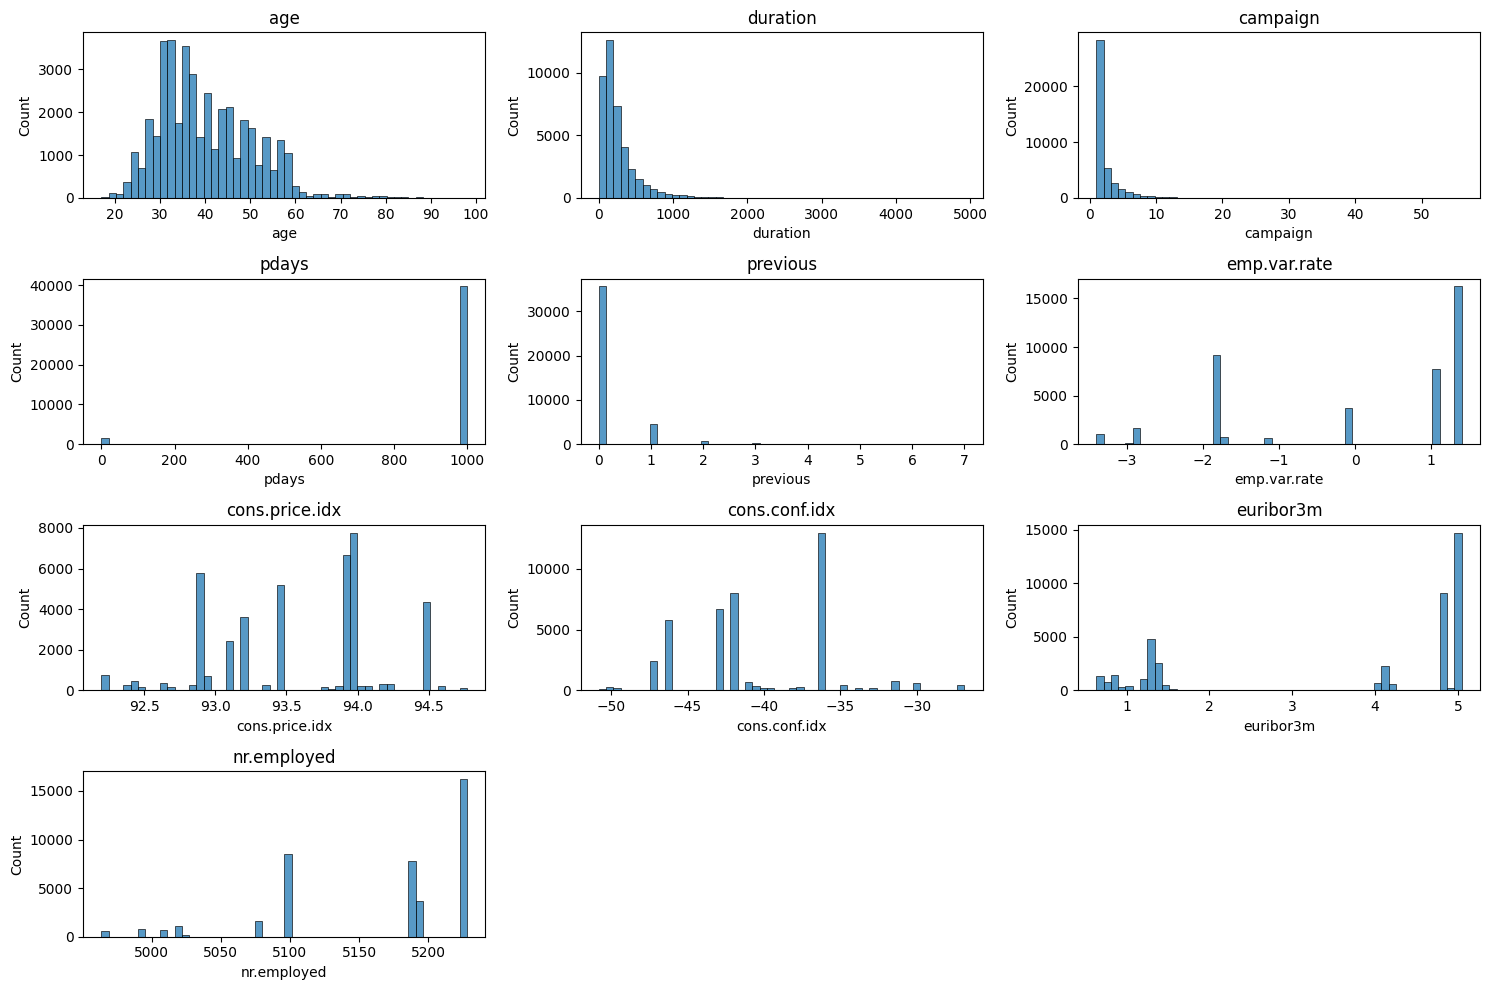

In [56]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_num.columns): # enumerate() se utiliza para obtener tanto el índice del elemento como el elemento en sí
    plt.subplot(4, 3, i+1) 
    sns.histplot(data=df_num, x=col, bins = 50) 
    plt.title(col)  

plt.tight_layout()  
plt.show()

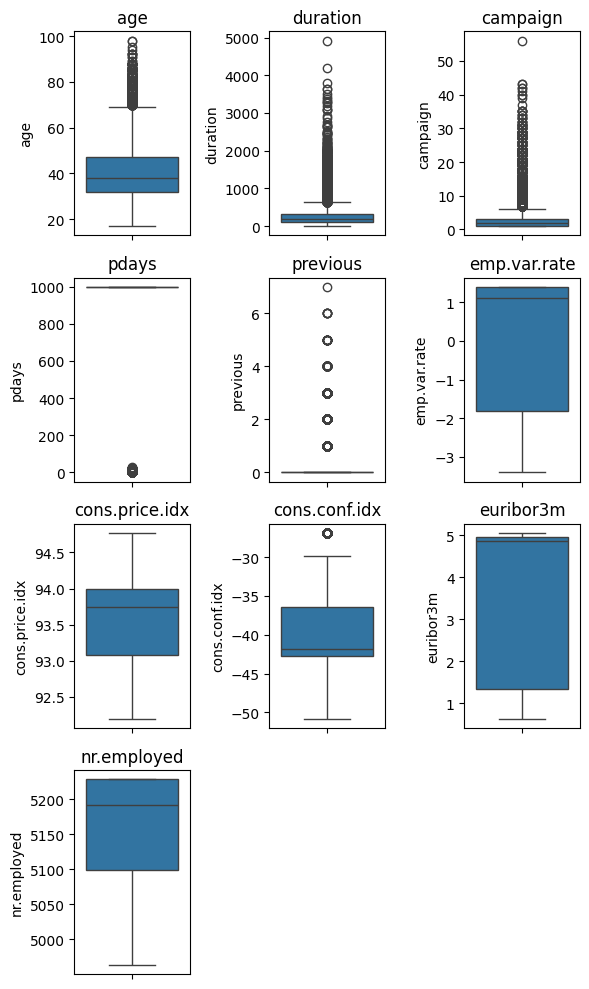

In [57]:
plt.figure(figsize= (6, 10))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)  
    sns.boxplot(data=df_num[col])  
    plt.title(col)  

plt.tight_layout()  
plt.show()  

In [58]:
df_num.drop(['pdays', 'previous'], axis = 1, inplace = True)

In [59]:
df_num.apply(lambda x: x.skew())

age               0.784697
duration          3.263141
campaign          4.762507
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

*Conclusiones variables numéricas*:
 - Variables eliminadas porque no son informativas: "pdays", "previous".
 - "duration" y "campaign" se encuentran sesgadas, pero en estos casos los valores extremos tienen valor y no vamos a winsorizar.
 - El resto de variables contienen valores aceptables y limpios.

### Análisis univariante: variables categóricas

In [60]:
df_cat.describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


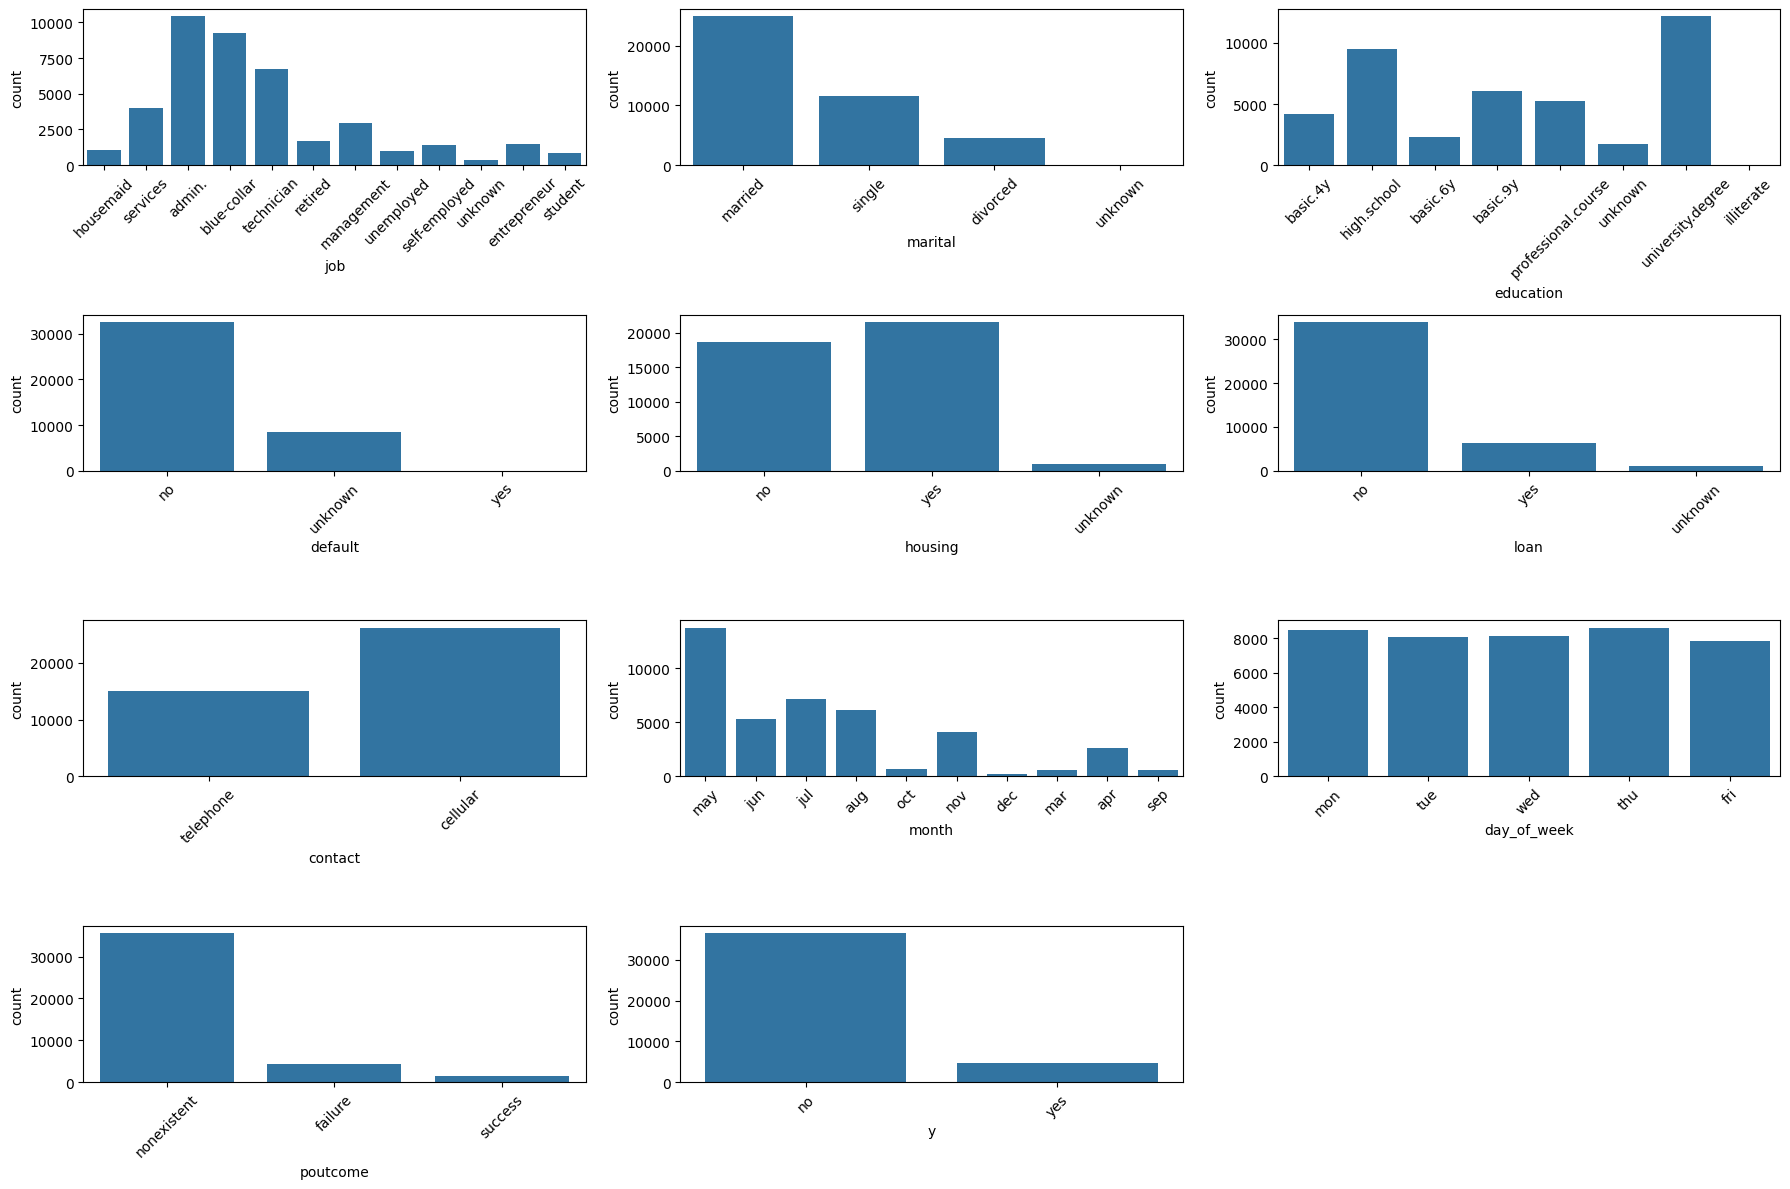

In [68]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, start = 1):
    plt.subplot(4, 3, i)  
    sns.countplot(data = df, x = col)
    plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()


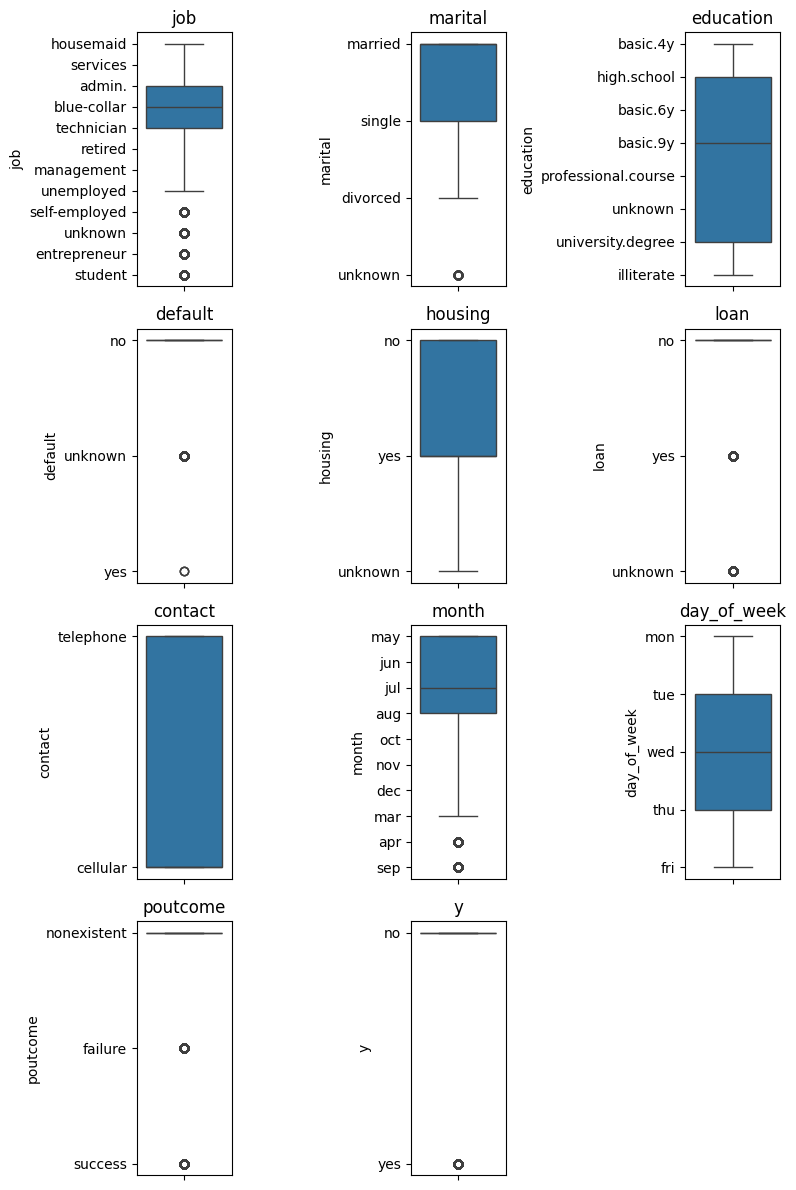

In [87]:
plt.figure(figsize= (8, 12))

for i, col in enumerate(df_cat.columns):
    plt.subplot(4, 3, i+1)  
    sns.boxplot(data=df_cat[col])  
    plt.title(col)  

plt.tight_layout()  
plt.show()  

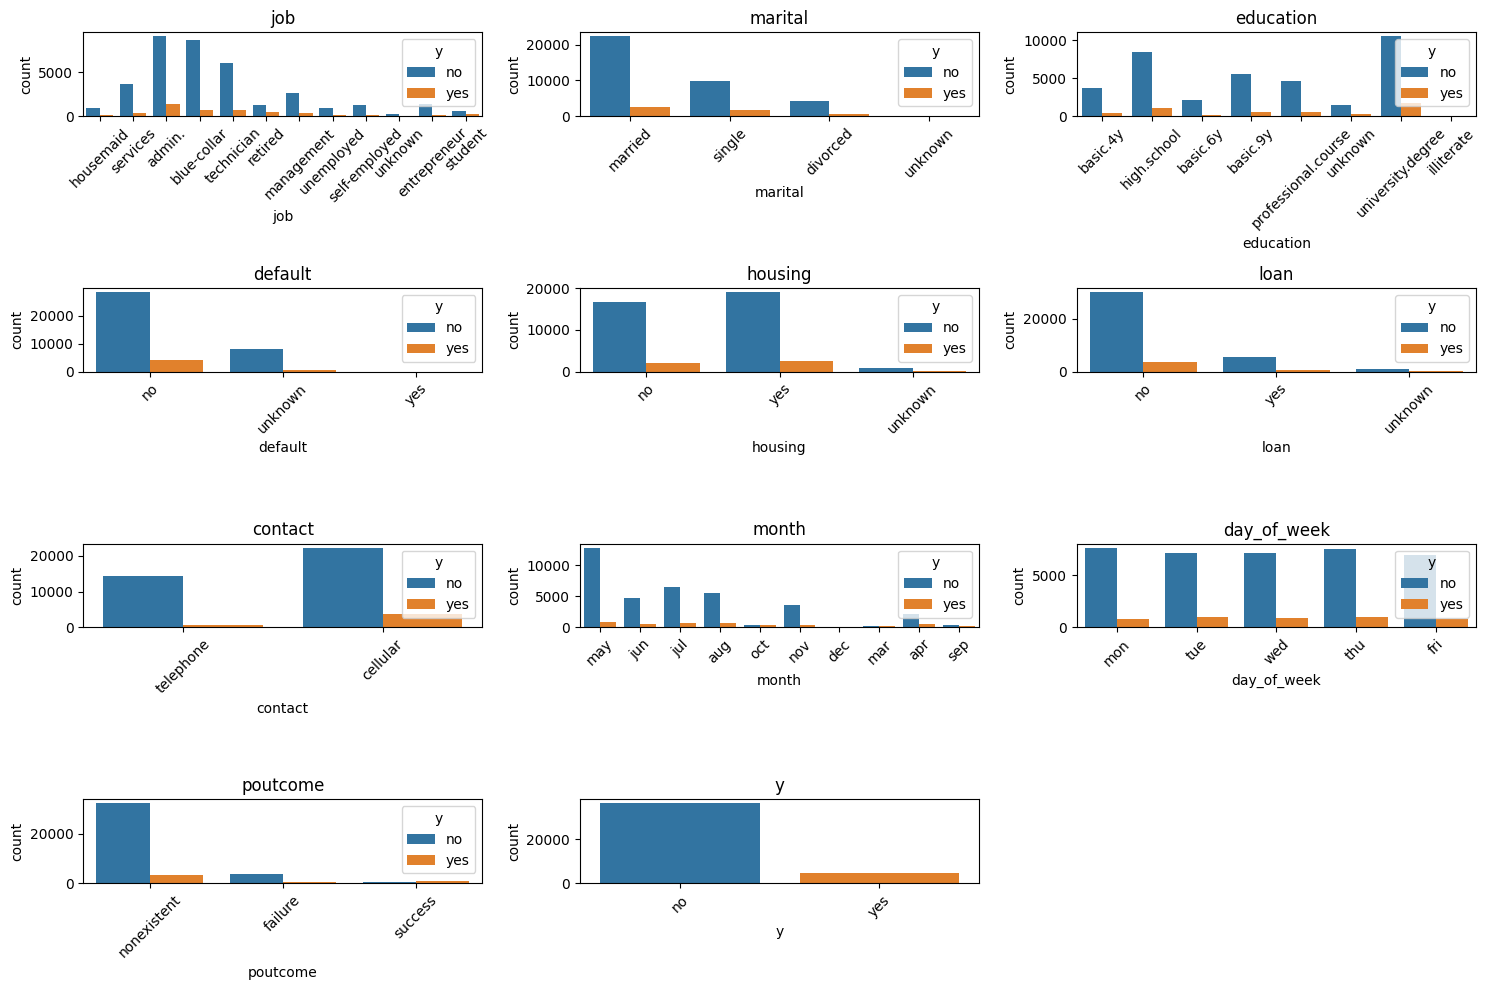

In [93]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_cat.columns):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=df_cat, x=col, hue='y')
    plt.title(col)
    plt.xticks(rotation=45)  # Inclina las etiquetas del eje y

plt.tight_layout()
plt.show()

 One hot: "y",
 Eliminar: "default", "poutcome" (casi todo "nonexistent")

In [ ]:
df_cat[df_cat['default'] == "yes"]

# "default" la vamos a eliminar, sólo 3 "yes", lo demás "no" o "unknown"

In [83]:
(df_cat['poutcome'] != "nonexistent").sum()

5625